# Edge and Corner Detection with Python OpenCV

Edge detection is a process of identifying and locating sharp discontinuities in an image. It is an important image processing technique that is widely used in computer vision and image analysis applications. 

There are several edge detection algorithms available, each with its own set of strengths and weaknesses. Here is a brief overview of some of the most popular edge detection algorithms and their typical uses:

1. **Canny edge detector**: This is a multi-stage edge detection algorithm that is widely used due to its good performance and the ability to provide accurate and robust results. It is often used in image analysis and computer vision applications.

2. **Sobel edge detector**: This edge detector uses the Sobel operator to compute the gradient magnitude of an image. It is commonly used to detect edges in images, especially in cases where the Canny edge detector may produce too many false positives.

3. **Laplacian edge detector**: This edge detector uses the Laplacian operator to compute the second derivative of an image. It is often used to detect edges that are not visible with the Canny or Sobel edge detectors, such as edges with low contrast or noise.

4. **Prewitt edge detector**: This edge detector uses the Prewitt operator to compute the gradient magnitude of an image. It is similar to the Sobel edge detector, but it is less sensitive to noise and produces fewer false positives.

5. **Roberts cross edge detector**: This edge detector uses the Roberts cross operator to compute the gradient magnitude of an image. It is faster than the Sobel and Prewitt edge detectors, but it is less accurate and may produce more false positives.



The images for this project where taken from here:
https://expressexpense.com/blog/free-receipt-images-ocr-machine-learning-dataset/

I found them during reading an interesting article:
https://www.inovex.de/de/blog/digitize-receipts-computer-vision/

In [23]:
import cv2
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

In [60]:
class EdgeDetection:
    def __init__(self, path: str):
        self.img = cv2.imread(path)

    def convert_image_to_grayscale(self, image = None, scale: int = cv2.COLOR_BGR2GRAY):
        if image is None:
            image = self.image
        gray = cv2.cvtColor(self.img, scale)
        return gray

    def apply_canny_edge_detection(self, image = None):
        if image is None:
            image = self.img
        edges = cv2.Canny(image, threshold1=100, threshold2=200)
        return edges
    
    def apply_sobel_edge_detection(self, image = None):
        if image is None:
            image = self.img
        sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
        sobel = np.sqrt(np.square(sobel_x) + np.square(sobel_y))
        sobel = sobel.astype('uint8')
        return sobel
    
    def get_corners_harris(self, image=None):
        # Image must be a grayscaled image!
        if image is None:
            image = self.img
        corners = cv2.cornerHarris(image, blockSize=1, ksize=3, k=0.04)
        corners = corners.astype('uint8')
        return corners
    
    def get_corners_gftt_detector(self, image=None):
        # Not Working for my Purpose
        if image is None:
            image = self.img
        detector = cv2.GFTTDetector_create()
        corners = detector.detect(image)
        return corners
    
    def process(self, *methods: str):
        img = self.img
        for method in methods:
            img = getattr(self, method)(img)
        return img

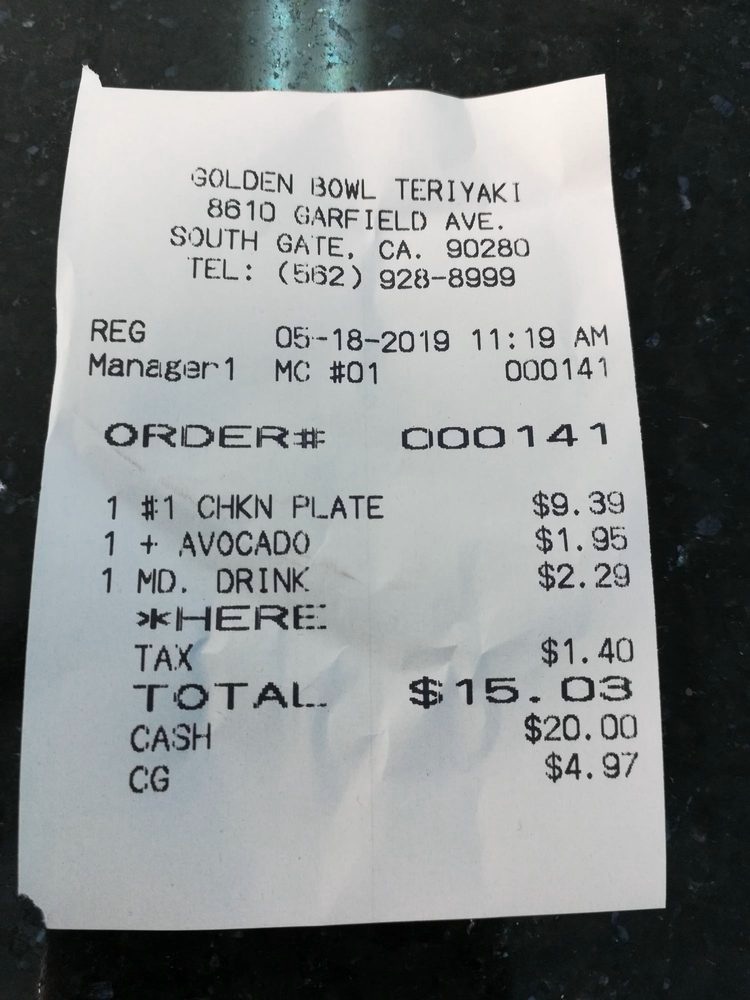

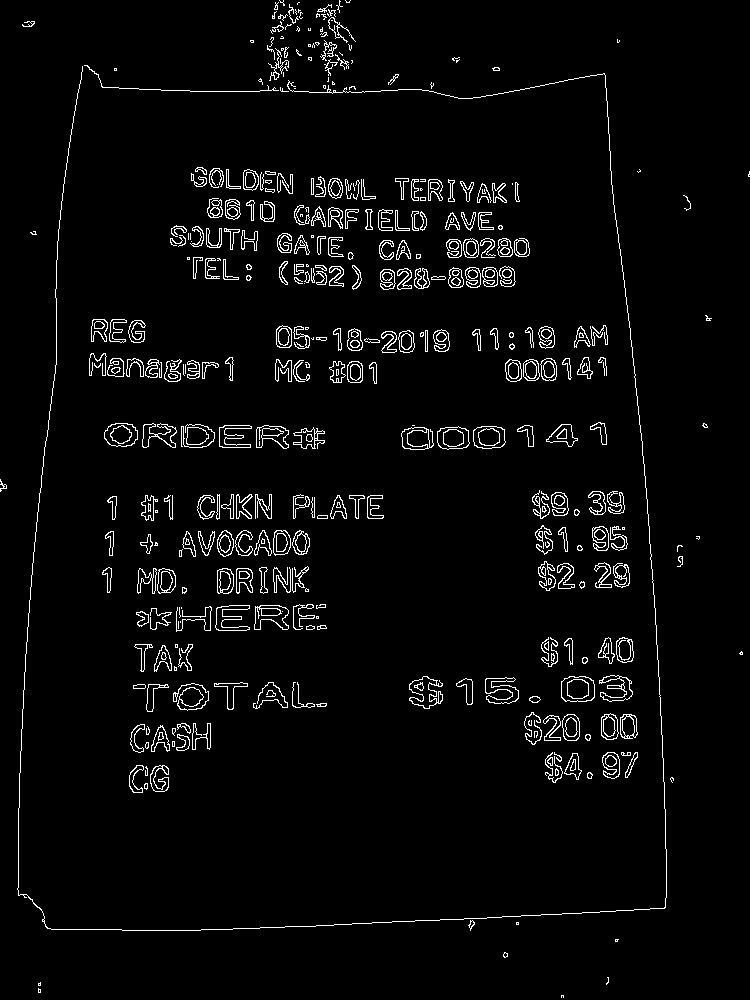

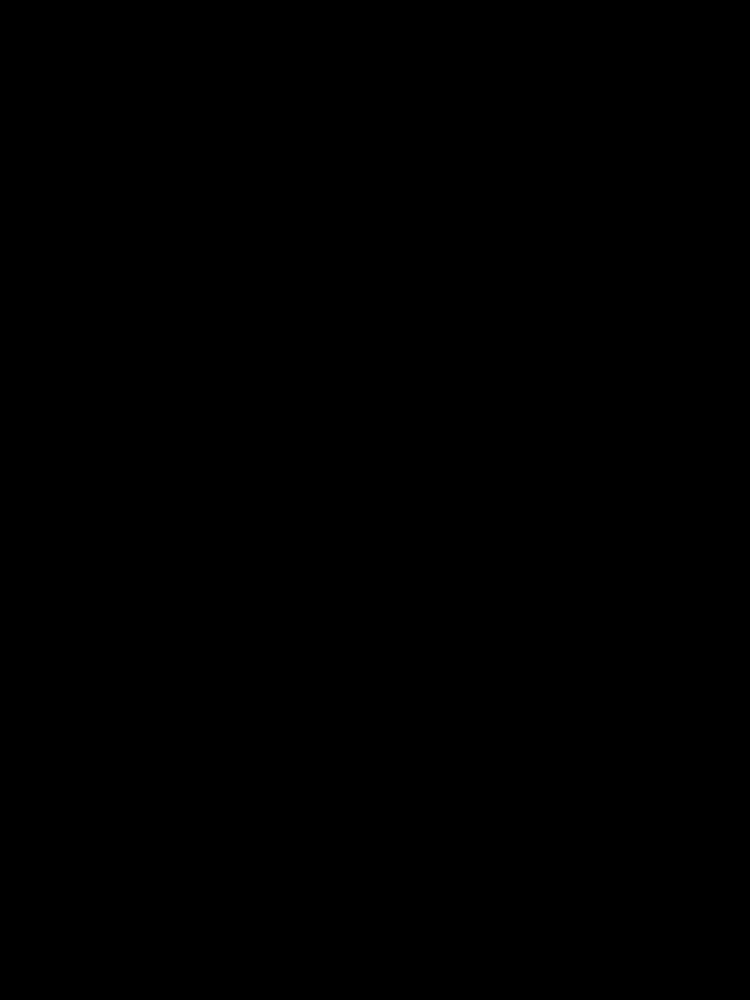

In [63]:
processor = EdgeDetection("./receipt_0.jpg")
img = processor.process(
    "convert_image_to_grayscale",
    "apply_canny_edge_detection"
)
corners_harris = processor.get_corners_harris(img)

# convert the images to PIL image objects
image_pil = Image.fromarray(processor.img)
edged_pil = Image.fromarray(img)
corner_pil1 = Image.fromarray(corners_harris)

# display the images
display(image_pil)
display(edged_pil)
display(corner_pil1)

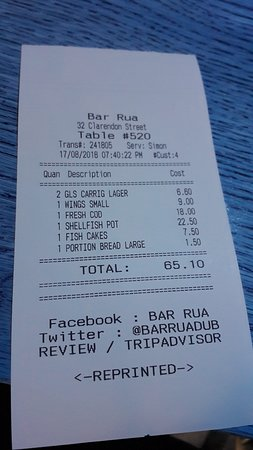

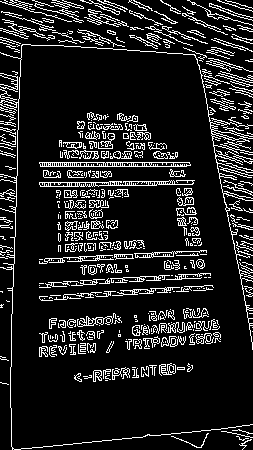

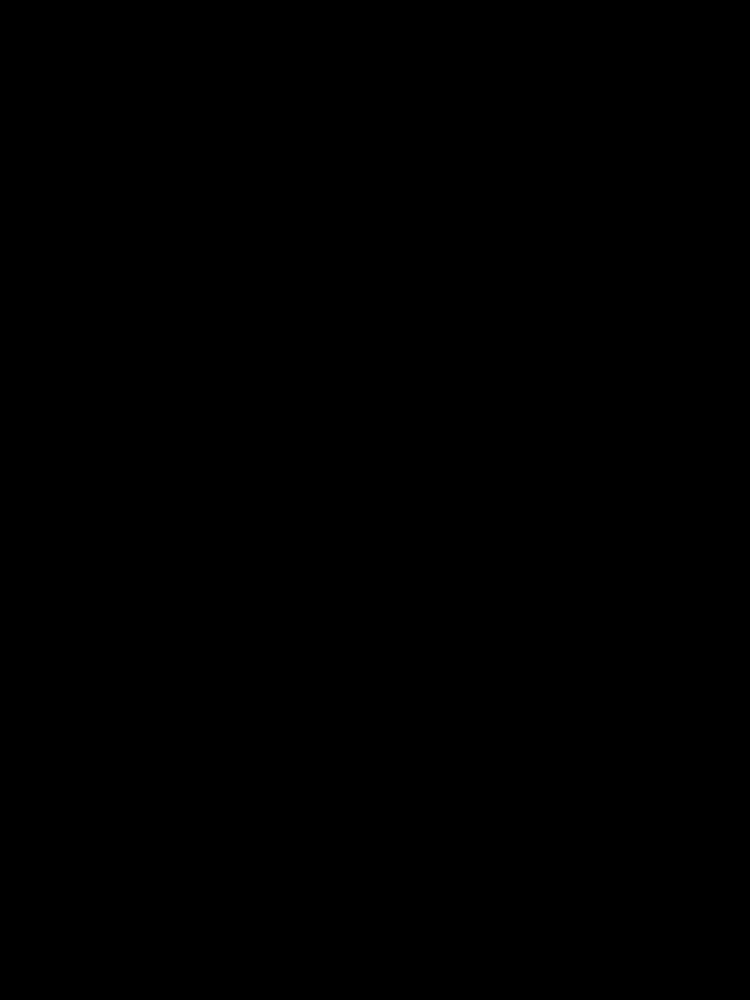

In [31]:
processor = EdgeDetection("./receipt_1.jpg")
img = processor.process(
    "convert_image_to_grayscale",
    "apply_canny_edge_detection"
)

corners = processor.get_corners(img)

# convert the images to PIL image objects
image_pil = Image.fromarray(processor.img)
edged_pil = Image.fromarray(img)
coner_pil = Image.fromarray(corners)

# display the images
display(image_pil)
display(edged_pil)
display(corner_pil)

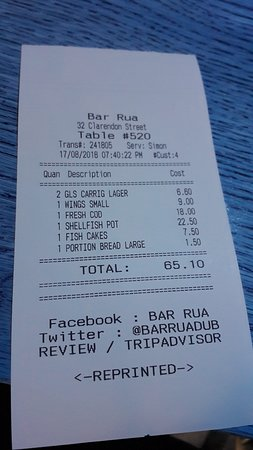

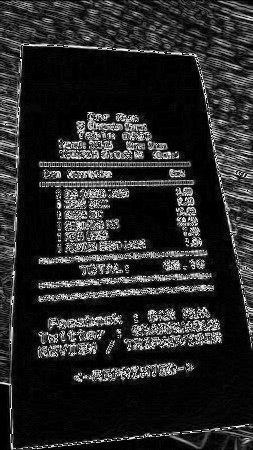

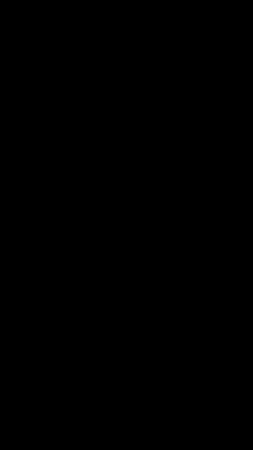

In [47]:
processor = EdgeDetection("./receipt_1.jpg")
img = processor.process(
    "convert_image_to_grayscale",
    "apply_sobel_edge_detection"
)
corners = processor.get_corners(img)

# convert the images to PIL image objects
image_pil = Image.fromarray(processor.img)
edged_pil = Image.fromarray(img)
corner_pil = Image.fromarray(corners)


# display the images
display(image_pil)
display(edged_pil)
display(corner_pil)